<font size=5  color=#003366> <b>[LELEC2900] - Signal Processing <br><br> 
Python02 - Multirate systems</b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. L. Vandendorpe<br>
Prof. L. Jacques
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Florian Quatresooz (florian.quatresooz@uclouvain.be) <br>
<br><br>
</font>

<font size=5 color=#009999> <b>1. Decimation and interpolation </b> </font> <br> <br>

<font size=5 color=#009999> <i>1.1 Gentle reminder</i> </font>


Multirate systems are fundamental in the design of modern signal processing techniques. In order to design such systems, one must be able to convert signals at higher or lower sample rates. With this aim in view, the concepts of interpolation and decimation have been addressed during the lectures: 


- <b>Interpolation</b> is used for converting a signal at a higher sample rate. The basic implementation of an interpolation filter (of factor $I$) consists in two successive steps:
    - inserting $I-1$ zeros between the samples of the original signal
    - Applying a low-pass filter on the signal.

    <img src="Imgs/image_4.png" width = "400">

- <b>Decimation</b> is used for converting a signal at a lower sample rate. The basic implementation of a decimation filter (of factor $D$) consists in two successive steps:

    - applying a low pass filter on the original signal (to avoid aliasing).
    - removing $D-1$ samples for every block of $D$ succesive samples.

    <img src="Imgs/image_5.png" width = "400">
    <br>
    
<font size=5 color=#009999> <i>1.2 Generate a sine wave</i> </font>

The objective of this exercise is to apply the operations of decimation and interpolation on a simple sine function, and to observe their effects in the spectral domain.

These operations of decimation and interpolation will be performed in three manners: 

<ol>
   <li> By applying the standard definitions of these operations (without using polyphase components).
   <li>By implementing polyphase components.
   <li> Using the built in function <samp>signal.resample_poly<samp>.
</ol>   
We consider a continuous sine function of unit amplitude and with a frequency of $100$ Hz. This function is corrupted by a zero mean Gaussian noise of variance $0.05$. One records noisy measurements of this signal during $0.04$ seconds with a sampling frequency of $10^4$ Hz. Generate a vector x containing these measured values. Plot the resulting sequence in the time domain as well as its DFT (in magnitude).

In [6]:
#---------------------------------------------------------------------------
#TO RUN
#We provide you two funtions to plot a time signal (with/without its DFT) in
#the make_graphs file. Open the file to read the function's description if 
#you want to use them.
#---------------------------------------------------------------------------

%load_ext autoreload
%autoreload 2
from make_graphs import *
import numpy as np   
from scipy import signal as signal
import matplotlib.pyplot as plt
import cmath as math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


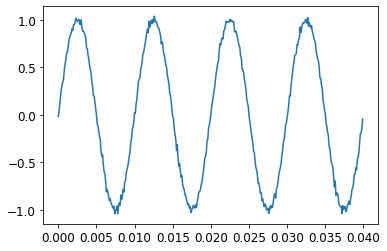

In [21]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

t = np.arange(0,0.04,0.0001)

SAMPLE_RATE = 10e4
DURATION = 0.04


x = np.sin(2*np.pi*100*t) + np.random.normal(0,0.05**2,len(t))*10
plt.plot(t,x)
plt.show()

<font size=5 color=#009999> <i>1.3 Standard decimation and interpolation</i> </font>

In order to simplify the sinusoidal storage or transmission, we decimate signal $x$ by $M=10$, after performing a proper lowpass filtering to minimize aliasing distortion. 

Since digital filters have not been covered yet in this course, the low-pass filter that we will implement here is arbitrarily chosen. We here select a moving average filter of order 20 since this filter is easy to implement.
As a reminder, the impulse response of a moving average filter of order $N$ is given by 
$$h[n] = \frac{1}{N}  ~\text{for}~ n = 0,...,N-1.$$

Since the impulse response of this filter is a rectangle, its Fourier transform is a cardinal sine, which can be used to perform the low pass filtering operation. 
    
Plot the decimated signal in the frequency domain as well as its DFT (in magnitude).


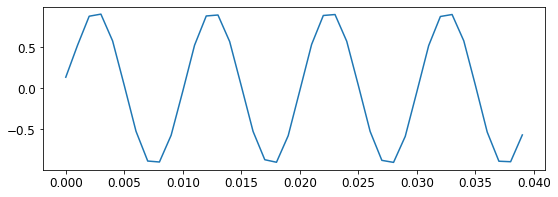

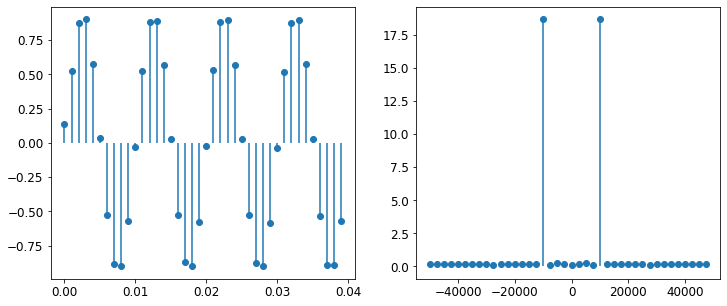

In [40]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

x_f = np.convolve(x,[1/20 for _ in range(20)],mode="same")

def decimate(x,M):
    n_x = []
    count = 0
    for k in x:
        if count == 0:
            n_x.append(k)
        count += 1
        count %= M
    return np.array(n_x)

x_f = decimate(x_f,10)
t_f = decimate(t,10)

plotSignal(t_f,x_f)



N = int(SAMPLE_RATE * DURATION/100)

yf = np.abs(np.fft.fft(x_f))
xf = np.fft.fftfreq(N, 1 / SAMPLE_RATE)


plotSignalAndDft(t_f,x_f,xf,yf)


Expand the rate back to its original value by introducing $(M-1)$ zeros between each two consecutive subsamples.
   
Plot the resulting sequence in the time domain as well as its DFT (in magnitude).

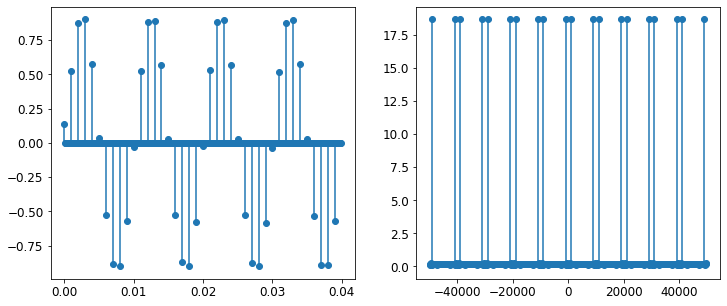

In [43]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
def interpolation(x,M):
    n_x = []
    for k in x:
        n_x.append(k)
        for _ in range(M-1):
            n_x.append(0)
    return n_x

n_x = interpolation(x_f,10)


N = int(SAMPLE_RATE * DURATION/10)

yf = np.abs(np.fft.fft(n_x))
xf = np.fft.fftfreq(N, 1 / SAMPLE_RATE)


plotSignalAndDft(t,n_x,xf,yf)

Remove the spectral repetitions induced by the inserted zeros by means of a low pass filter. Make use of a triangular filter of length $20$ (using the function <samp>signal.triang</samp>).

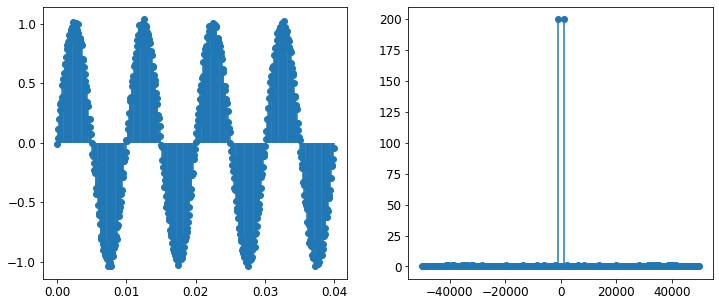

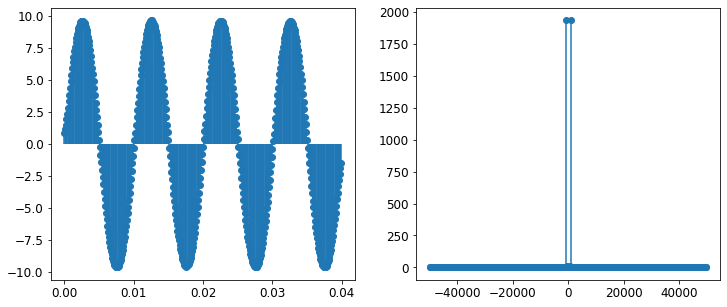

In [46]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------
tri = signal.triang(20)

x_df = np.convolve(x,tri,mode="same")

N = int(SAMPLE_RATE * DURATION/10)

yf = np.abs(np.fft.fft(x))
xf = np.fft.fftfreq(N, 1 / SAMPLE_RATE)


plotSignalAndDft(t,x,xf,yf)


N = int(SAMPLE_RATE * DURATION/10)

yf = np.abs(np.fft.fft(x_df))
xf = np.fft.fftfreq(N, 1 / SAMPLE_RATE)


plotSignalAndDft(t,x_df,xf,yf)




Compare the resulting signals with the original signal before decimation. What do you observe (in the time and frequency domains)?

<font size=5 color=#009999> <i>1.4 Decimation and interpolation using polyphase components</i> </font>

As explained in the slides of Lecture 3, it is possible to employ polyphase components to perform rate changing operations using less operations. Repeat the rate changing operations of the previous section using this approach.

In [ ]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------

def decimate_poly(x,M,F):
    n_x = []
    for poly_index in range(M):
        poly_data = np.convolve(x[poly_index::M],F[poly_index::M])
        
    


<font size=5 color=#009999> <i>1.5 Decimation and interpolation using Python built in function</i> </font>

Repeat the rate-changing operations employed in the present experiment by using functions signal.resample_poly from scipy.  


In [ ]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------


Compare the recovered signals in time and frequency with those obtained in section A.

<font size=5 color=#009999> <b>2. Filter banks </b> </font> <br> <br>

In the framework of the following exercise, we introduce the concept of <b>filter bank</b> (see figure below).

A filter bank consists in an array of bandpass filters that separate an original signal $x[n]$ into $N$ subband signals $y_k[n]$. 
Each of these subband signals contains a specific portion of the spectrum of the original signal. <br>
The process of separating and modifying the subband signals is called <b>analysis</b>. <br>
The process of recombining the subband signals into one total output signal is called <b>synthesis</b>.

<img src="Imgs/image_1.png" width = "800"><br><br>

<font size=5 color=#009999> <i>2.1 Example of application </i> </font>

In practice, a filter bank can be used for instance to manipulate audio signals. In the analysis filter bank, the signal is first decomposed into different subband signals. These subbands signals $y_k[n]$ can then be modified (to become $\hat{y}_k[n]$). Possible modifications can include

- Downsampling
- Storage/transmission
- Filtering
- ...

In the case of audio signals, some frequencies are more important than others for the hearing. If the signal has to be stored in a memory for instance: 

- subband signals associated to frequencies that are less 'important' can be compressed at a lower resolution
- subband signals associated to frequencies that are more important can be compressed at a higher resolution

<br><br>
<font size=5 color=#009999> <i>2.2 Uniform filter bank </i> </font>

If the filters $H_k(e^{j\Omega})$ ($k=1,...,M-1$) are all shifted versions of a prototype filter $H_0(e^{j\Omega})$, the filter bank is called <b>uniform</b>. 

<img src="Imgs/image_2.png" width = "650">

In that case, it is possible to implement the entire filter bank by using the polyphase components $P_k$ of $H_0(e^{j\Omega})$ only.
The corresponding structure is represented in the figure below. 

<img src="Imgs/image_3.png" width ="500">

<br><br>
<font size=5 color=#009999> <i>2.3 Implementation </i> </font>

Let us consider the continuous time signal given by 

\begin{equation*}
 x(t) = sin(2\pi f_1t) + sin(2\pi f_2t) + sin(2\pi f_3t) + 1
\end{equation*}

where $f_1 = 200$ Hz, $f_2 = 400$ Hz and $f_3 = 600$ Hz

This signal is sampled at a sampling rate $f_s = 1400 $ Hz during 1 second. 

In order to separate the three frequencies and the DC component of the signal, we would like to employ a uniform filter bank. As prototype filter, we would like to use a moving average filter of order 14. 

Implement the uniform filter bank based on this prototype using the polyphase representation in the last figure.

(Nb: the triangle with $M$ at the beginning of the figure represents an amplification of factor $M$ (in order to compensate for the factor $1/M$ in the definition of the IDFT)

In [ ]:
#---------------------------------------------------------------------------
#TO COMPLETE
#---------------------------------------------------------------------------


<font size=5 color=#009999> <i>2.3 (To go further - Optional) Analytical proof </i> </font>

<img src="Imgs/image_3.png" width ="500">

Show analytically that the implementation of the above figure is correct (i.e. that it implements a uniform filter bank) and explain why it is efficient in terms of complexity (compared to a direct implementation).